In [2]:
'''
 Fourth order Runge-Kutta Method for solving odes:
  Given an ode of the form:
  y' = f(x, y)
  Let the initial values be x0, y0. If x0 is given an increment h, then
  the increment in y is obtained as follows:
  k1 = h * f (x0, y0)
  k2 = h * f (x0 + h/2, y0 + k1/2)
  k3 = h * f (x0 + h/2, y0 + k2/2)
  k4 = h * f (x0 + h, y0 + k3)
  delta_y = (k1 + 2 * k2 + 2 * k3 + k4) / 6
  x1 = x0 + h
  y1 = y0 + delta_y
  Similarly calculate values (x2, y2), (x3, y3), etc.
'''

"\n Fourth order Runge-Kutta Method for solving odes:\n  Given an ode of the form:\n  y' = f(x, y)\n  Let the initial values be x0, y0. If x0 is given an increment h, then\n  the increment in y is obtained as follows:\n  k1 = h * f (x0, y0)\n  k2 = h * f (x0 + h/2, y0 + k1/2)\n  k3 = h * f (x0 + h/2, y0 + k2/2)\n  k4 = h * f (x0 + h, y0 + k3)\n  delta_y = (k1 + 2 * k2 + 2 * k3 + k4) / 6\n  x1 = x0 + h\n  y1 = y0 + delta_y\n  Similarly calculate values (x2, y2), (x3, y3), etc.\n"

ERROR! Session/line number was not unique in database. History logging moved to new session 238


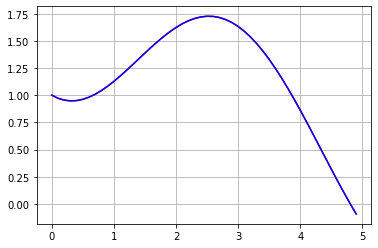

0.1 [ 0.00000000e+00 -1.08131371e-09 -2.10439866e-09 -3.05362824e-09
 -3.91452082e-09 -4.67385952e-09 -5.31980848e-09 -5.84200954e-09
 -6.23166962e-09 -6.48162990e-09 -6.58642052e-09 -6.54230137e-09
 -6.34728248e-09 -6.00113004e-09 -5.50535639e-09 -4.86318963e-09
 -4.07953049e-09 -3.16089133e-09 -2.11531925e-09 -9.52304458e-10
  3.17323279e-10  1.68151293e-09  3.12712589e-09  4.64006833e-09
  6.20544860e-09  7.80772869e-09  9.43088918e-09  1.10585965e-08
  1.26743738e-08  1.42617700e-08  1.58045317e-08  1.72867727e-08
  1.86931364e-08  2.00089565e-08  2.12204063e-08  2.23146432e-08
  2.32799424e-08  2.41058171e-08  2.47831271e-08  2.53041752e-08
  2.56627866e-08  2.58543761e-08  2.58759950e-08  2.57263649e-08
  2.54058931e-08  2.49166712e-08  2.42624575e-08  2.34486410e-08
  2.24821906e-08  2.13715876e-08]
Root Mean Square Error:

1.5363885450114292e-08


In [2]:
import numpy as np
import matplotlib.pyplot as plt
  
def rk4_1d (f, x0, y0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = x = x = np.linspace(x0, xmax, int((xmax - x0) / h))

    # zero out the range of the function for the given domain
    y = np.zeros_like (x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0

    # now compute the range using the Runge-Kutta formalism
    for i in range (1,len(y)):
        k1 = h * f (x[i-1], y[i-1])
        k2 = h * f (x[i-1] + h/2, y[i-1] + k1/2)
        k3 = h * f (x[i-1] + h/2, y[i-1] + k2/2)
        k4 = h * f (x[i-1] + h, y[i-1] + k3)
        delta_y = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x[i] = x[i-1] + h
        y[i] = y[i-1] + delta_y

    # return the solution
    return x, y

def main():
    # define your function f(x, y) as a lambda function
    # specify x even if x does not show up in f(x, y)
    f = lambda x, y: -y/3 + np.sin(x) 

    # specify the initial conditions
    x0 = 0
    y0 = 1

    # specify the max in your domain
    xmax = 5

    # specify the increment in x
    dx = .1

    # get the solution of the differential equation
    x, y = rk4_1d (f, x0, y0, xmax, dx)

    # display the  numerical solution
    plt.plot (x, y, 'red')

    # for the vector (domain) x get the analytical range y_actual
    y_actual = (1/10) * (19 * np.e**(-x/3) + 3 * np.sin(x) - 9 * np.cos(x))

    # display the analytical solution
    plt.plot (x, y_actual, 'blue')

    plt.grid()
    plt.show()

    # estimate the error of your numerical solution
    # obtain the root-mean-square of your residuals (y - y_actual)
    std = y - y_actual

    # print both dx and std to the same precision for comparison
    print(dx, std)
    
    MSE = np.square(np.subtract(y_actual,y)).mean() 
 
    RMSE = np.sqrt(MSE)
    print("Root Mean Square Error:\n")
    print(RMSE)
    
main()


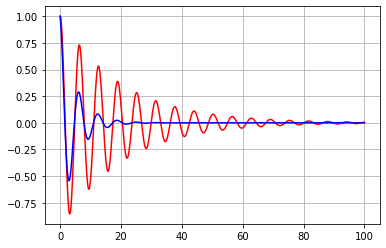

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
  
def euler_2d (f, x0, y0, v0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = np.linspace(x0, xmax, int((xmax-x0)/h))

    # zero out the range of the function for the given domain
    y = np.zeros_like (x)
    v = np.zeros_like (x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0
    v[0] = v0

    # now compute the range using Euler's approximation
    for i in range (1, int((xmax-x0)/h)):
        y[i] = y[i-1] + h * v[i-1]
        v[i] = v[i-1] + h * f(x[i-1], y[i-1], v[i-1])

    # return the solution
    return x, y

def main():
    # define your function f(x, y) as a lambda function
    # specify x even if x does not show up in f(x, y)
    b = 0.2
    w = 1
    f = lambda x, y, v: -b*v - w**2*y

    # specify the initial conditions
    x0 = 0
    y0 = 1
    v0 = 0

    # specify the max in your domain
    xmax = 100

    # specify the increment in x
    dx = 0.1

    # get the solution of the differential equation
    x, y = euler_2d (f, x0, y0, v0, xmax, dx)

    # display the  numerical solution
    plt.plot (x, y, 'red')

    # for the vector (domain) x get the analytical range y_actual
    y_actual = []
    for xi in x:
        y_actual.append(y0*math.cos(w*xi)*math.exp(-b*xi))

    # display the analytical solution
    plt.plot (x, y_actual, 'blue')

    plt.grid()
    plt.show()

    # estimate the error of your numerical solution
    # obtain the root-mean-square of your residuals (y - y_actual)
    #std = 

    # print both dx and std to the same precision for comparison

main()